In [77]:
import pandas as pd
from datetime import date

In [88]:
atlas_data_df = pd.read_excel('data/data_atlas.xlsx', headers=0)

In [89]:
df = atlas_data_df
df.Valmistunut = pd.to_datetime(df.Valmistunut, format='%Y-%m-%d', errors='coerce')
df.loc[df.Valmistunut.isin(['2099-01-01', '2050-12-31']), 'Valmistunut'] = pd.NaT

CONSUMPTION_TYPES = (
    'Lämmitys yhteensä', 'Tilojen lämmitys', 'Veden lämmitys', 'Kiinteistösähkö', 'Käyttäjäsähkö'
)
BUILDING_CLASS_ENERGY_CONSUMPTION = (
    ('LPR4', '65', '57', '8', '27', '53'),
    ('LPR3', '138', '130', '8', '26', '53'),
    ('LPR2', '173', '165', '8', '16', '53'),
    ('LPR1', '291', '283', '8', '14', '53'),
    ('OKT4', '116', '93', '23', '12', '33'),
    ('OKT3', '176', '153', '23', '10', '33'),
    ('OKT2', '228', '205', '23', '8', '33'),
    ('OKT1', '286', '263', '23', '8', '33'),
    ('RKT9', '82', '45', '37', '16', '40'),
    ('RKT8', '112', '75', '37', '16', '40'),
    ('RKT7', '132', '95', '37', '15', '40'),
    ('RKT6', '135', '98', '37', '15', '40'),
    ('RKT5', '136', '99', '37', '14', '40'),
    ('RKT4', '140', '103', '37', '14', '40'),
    ('RKT3', '143', '106', '37', '13', '40'),
    ('RKT2', '147', '110', '37', '13', '40'),
    ('RKT1', '130', '93', '37', '12', '40'),
)

In [90]:
efficiency_by_class = {x[0]: {z[0]: int(z[1]) for z in zip(CONSUMPTION_TYPES, x[1:])} for x in BUILDING_CLASS_ENERGY_CONSUMPTION}
pd.options.display.max_columns = None
for col_name, energy_name in (('Lämmönkulutus', 'Lämmitys yhteensä'), ('Kiinteistösähkönkulutus', 'Kiinteistösähkö'), ('Käyttäjäsähkönkulutus', 'Käyttäjäsähkö')):
    energy_efficiency = df.rakennusryhma.map(lambda x: efficiency_by_class.get(x, {}).get(energy_name))
    df[col_name] = df.Kokonaisala * energy_efficiency

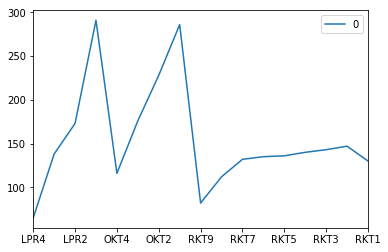

In [99]:
df = pd.DataFrame([x['Lämmitys yhteensä'] for x in efficiency_by_class.values()], efficiency_by_class.keys())
%matplotlib inline
df.plot()

In [81]:
import quilt
from quilt.data.jyrjola import energiaatlas

node = energiaatlas
node._set(['buildings'], df)
quilt.build('jyrjola/energiaatlas', node)
quilt.push('jyrjola/energiaatlas', is_public=True)

{'children': {'buildings': <quilt.tools.core.FileNode object at 0x7f6576fbd1c8>},
 'type': 'ROOT'}
'5eb5f7243c95df0b28d5a6dae1bb16174bfef56176c08f096109e56173034a78'
Fetching upload URLs from the registry...
{
    "dry_run": true,
    "is_public": true,
    "is_team": false,
    "contents": {
        "type": "ROOT",
        "children": {
            "buildings": {
                "type": "FILE",
                "hashes": [
                    "e6e26717fb9712d1b26ce771bce8309c9826634a7241570be768d9d809faebf6"
                ],
                "metadata": {
                    "q_ext": null,
                    "q_path": null,
                    "q_target": "pandas"
                }
            }
        }
    },
    "description": "",
    "sizes": {}
}


  0%|          | 0.00/5.82M [00:00<?, ?B/s]

Uploading 1 fragments (5816514 bytes)...


100%|██████████| 5.82M/5.82M [00:05<00:00, 1.04MB/s]


Uploading package metadata...
{
    "dry_run": false,
    "is_public": true,
    "is_team": false,
    "contents": {
        "type": "ROOT",
        "children": {
            "buildings": {
                "type": "FILE",
                "hashes": [
                    "e6e26717fb9712d1b26ce771bce8309c9826634a7241570be768d9d809faebf6"
                ],
                "metadata": {
                    "q_ext": null,
                    "q_path": null,
                    "q_target": "pandas"
                }
            }
        }
    },
    "description": "",
    "sizes": {
        "e6e26717fb9712d1b26ce771bce8309c9826634a7241570be768d9d809faebf6": 5816514
    }
}
Updating the 'latest' tag...
Push complete. jyrjola/energiaatlas is live:
https://quiltdata.com/package/jyrjola/energiaatlas


In [82]:
from quilt.data.jyrjola import energiaatlas, hsy
atlas_buildings = energiaatlas.buildings()
hsy_buildings = hsy.buildings()

atlas_buildings.query("rakennusryhma == 'RKT1'")

,VTJ_PRT,RATU,UUID,GroundLevel,Kerroksia,Kokonaisala,Tilavuus,Valmistunut,energiatehokkuusluku,energiatehokkuusluokka,energiatod_ilmanvaihtojarjestelman_kuvaus,energiatod_katuosoite,energiatod_keskeiset_huomiot,energiatod_kuluttajalaitteet_ja_valaistus_sahko,energiatod_laatimispaiva,energiatod_lammitetty_nettoala,energiatod_lammitysjarjestelman_kuvaus,energiatod_luku,energiatod_luokka,energiatod_rakennuksen_kayttotarkoitusluokka,energiatod_rakennuksen_nimi,energiatod_rakennusluokka,energiatod_todistustunnus,energiatod_viimeinen_voimassaolopaiva,energiatod_yritys,ilmanvuotoluku_alle_4,katuosoite,kaukolampo_2015_mwh,kaukolampo_2016_mwh,kayttotarkoitus,kayttotarkoitus1,kerrosala_m2,korjaus_aloitettava_viimeistaan_paiva1,korjaus_aloitettava_viimeistaan_paiva2,korjaus_aloitettava_viimeistaan_paiva3,korjaus_aloitettava_viimeistaan_paiva4,korjaus_aloitettava_viimeistaan_paiva5,korjaus_aloitettava_viimeistaan_paiva6,korjaus_aloitettava_viimeistaan_paiva8,korjaus_hakusana1,korjaus_hakusana2,korjaus_hakusana3,korjaus_hakusana4,korjaus_hakusana5,korjaus_hakusana6,korjaus_hakusana7,korjaus_hakusana8,korjaus_ikkunoiden_uusiminen,korjaus_ilmastoinnin_lammontalteenotto,korjaus_lainvoimaisuuspaiva1,korjaus_lainvoimaisuuspaiva2,korjaus_lainvoimaisuuspaiva3,korjaus_lainvoimaisuuspaiva4,korjaus_lainvoimaisuuspaiva5,korjaus_lainvoimaisuuspaiva6,korjaus_lainvoimaisuuspaiva7,korjaus_lainvoimaisuuspaiva8,korjaus_lupa_voimassa_saakka_pvm1,korjaus_lupa_voimassa_saakka_pvm2,korjaus_lupa_voimassa_saakka_pvm3,korjaus_lupa_voimassa_saakka_pvm4,korjaus_lupa_voimassa_saakka_pvm5,korjaus_lupa_voimassa_saakka_pvm6,korjaus_lupa_voimassa_saakka_pvm7,korjaus_lupa_voimassa_saakka_pvm8,korjaus_lupatunnus1,korjaus_lupatunnus2,korjaus_lupatunnus3,korjaus_lupatunnus4,korjaus_lupatunnus5,korjaus_lupatunnus6,korjaus_lupatunnus7,korjaus_lupatunnus8,korjaus_tunnustyyppi1,korjaus_tunnustyyppi2,korjaus_tunnustyyppi3,korjaus_tunnustyyppi4,korjaus_tunnustyyppi5,korjaus_tunnustyyppi6,korjaus_tunnustyyppi7,korjaus_tunnustyyppi8,korjaus_ulkoseinien_lisalammoneristys,korjaus_valmistumispaiva1,korjaus_valmistumispaiva2,korjaus_valmistumispaiva3,korjaus_valmistumispaiva4,korjaus_valmistumispaiva5,korjaus_ylapohjan_lisalammoneristys,kylma_vesi_2015_m3,kylma_vesi_2016_m3,lammitystapa,energialahde,rakennusaine,rakennuslupa_saapumispaiva1,rakennuslupa_saapumispaiva2,rakennuslupa_saapumispaiva3,rakennuslupa_saapumispaiva4,rakennuslupa_saapumispaiva5,rakennuslupa_saapumispaiva6,rakennuslupa_saapumispaiva7,rakennuslupa_saapumispaiva8,rakennusryhma,sahkoenergia_2015_kwh,sahkoenergia_2016_kwh,suojeltava_rakennus,valmistumisvuosi,Lämmönkulutus,Kiinteistösähkönkulutus,Käyttäjäsähkönkulutus
3801,1007240530,9663.0,5f5b7af2-24ee-42b7-8b2f-cb67d87a81ea,0.56,5.0,3269.0,11542.0,1938-12-31,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pohjoiskaari 15,NaN,NaN,Muut kerrostalot,Yleinen tai liikerakennus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Vesikeskuslämmitys,Kauko- tai aluelämpö,Tiili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RKT1,NaN,NaN,NaN,1938.0,424970.0,39228.0,130760.0
5320,1024037935,53085.0,d9d2d919-789b-43e1-8175-2b11248379b2,4.98,2.0,374.0,1250.0,1836-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talosaarentie 276,NaN,NaN,Muut kerrostalot,Asuinrakennus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suora sähkölämmitys,Sähkö,Puu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RKT1,NaN,NaN,NaN,1836.0,48620.0,4488.0,14960.0
5378,100747624B,53549.0,7354059c-d926-4a18-b208-74feacef1266,15.45,2.0,746.0,2040.0,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [101]:
hdf = hsy_buildings[['vtj_prt', 'elec_kwh_v']].dropna().set_index('vtj_prt')
df = atlas_buildings.dropna(subset=['VTJ_PRT']).set_index('VTJ_PRT')
df = df.merge(hdf, left_index=True, right_index=True)

In [120]:
df['energiatod_todistustunnus'].isna().value_counts()

True     45893
False      951
Name: energiatod_todistustunnus, dtype: int64

In [84]:
all_heat = df['Lämmönkulutus'].sum()
#(df.groupby('rakennusryhma')['Lämmönkulutus', 'elec_kwh_v'].sum() / all_heat * 100).round(1).astype('str') + ' %'
grouped = df.groupby('rakennusryhma')['Lämmönkulutus', 'Kiinteistösähkönkulutus', 'elec_kwh_v'].sum() / 1000000
df = grouped.rename(columns=dict({'Lämmönkulutus': 'Lämmönkulutus (GWh)', 'elec_kwh_v': 'PV-potentiaali (GWh)', 'Kiinteistösähkönkulutus': 'Kiinteistösähkönkulutus (GWh)'})).round(1)